In [1]:
!pip install langchain

In [2]:
!pip install -qU langchain-nvidia-ai-endpoints

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 94.6 MB/s eta 0:00:00


In [3]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA
from google.colab import userdata

API_KEY = userdata.get('NVIDIA_API_KEY')


client = ChatNVIDIA(
  model="meta/llama-3.1-405b-instruct",
  api_key=API_KEY,
  temperature=0.2,
  top_p=0.7,
  max_tokens=1024,
)

In [4]:
for chunk in client.stream([{"role":"user","content":"Write a limerick about the wonders of GPU computing."}]):
  print(chunk.content, end="")


Here is a limerick about GPU computing:

There once was a GPU so fine,
Whose parallel processing was divine.
It crunched with great zest,
Through complex tasks with the best,
And made computing speeds truly sublime.

In [5]:
!pip install --quiet --upgrade langchain-text-splitters langchain-community langchain-core


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.5/409.5 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.1 MB/s eta 0:00:00


In [6]:
LANGCHAIN_TRACING_V2 = userdata.get('LANGCHAIN_TRACING_V2')
LANGCHAIN_API_KEY = userdata.get('LANGCHAIN_API_KEY')

In [7]:
!pip install beautifulsoup4 requests


In [8]:
import requests
from bs4 import BeautifulSoup

# Base URL
base_url = "https://support.launchgood.com"

# Starting page
start_page = "/support/home"

# Function to get all links from a page
def get_links(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    links = set()
    for a_tag in soup.find_all("a", href=True):
        href = a_tag["href"]
        # Include only links starting with the base URL or relative paths
        if href.startswith("/") or href.startswith(base_url):
            full_url = href if href.startswith(base_url) else f"{base_url}{href}"
            links.add(full_url)
    return links

# Crawl the home page for links
all_links = get_links(f"{base_url}{start_page}")
print(f"Found {len(all_links)} links:")
for link in all_links:
    print(link)


Found 21 links:
https://support.launchgood.com/support/solutions/35000140783
https://support.launchgood.com/support/solutions/35000140787
https://support.launchgood.com/support/solutions/35000147875
https://support.launchgood.com/support/tickets/new
https://support.launchgood.com/support/solutions/35000148193
https://support.launchgood.com/support/home
https://support.launchgood.com/support/solutions/articles/35000231421-all-you-need-to-know-about-givingtuesday-on-launchgood
https://support.launchgood.com/support/solutions/articles/35000231714-maximize-your-givingtuesday-impact-tips-resources-webinars-and-expert-support
https://support.launchgood.com/support/solutions/35000140786
https://support.launchgood.com/support/solutions/35000140785
https://support.launchgood.com/support/solutions/35000140784
https://support.launchgood.com/support/solutions/35000140781
https://support.launchgood.com/support/solutions/articles/35000169654-what-and-when-is-givingtuesday-
https://support.launchgood

In [10]:
from langchain_community.document_loaders import WebBaseLoader

# Convert the set of links into a list
all_links = list(all_links)

# Initialize the WebBaseLoader for all links
loader = WebBaseLoader(
    web_paths=all_links,
    bs_kwargs={}  # Use default HTML parser
)

# Load the content from all links
docs = loader.load()

# Display results
print(f"Loaded {len(docs)} documents.")
for i, doc in enumerate(docs[:5]):  # Preview first 5 documents
    print(f"Document {i+1} Content (First 500 characters):\n{doc.page_content[:500]}\n")


Loaded 21 documents.
Document 1 Content (First 500 characters):









 Getting Started  LaunchGood Support Center 





         










































LaunchGood



LaunchGood Support Center







toggle menu





Enter your search term here...






				Search
			









Enter your search term here...






				Search
			







LaunchGood Support



Get Support
 Welcome   Login  Sign up





Getting Started
How to raise funds for a charity, creative project, or a loved one or support incredible campaigns. Start building an inspir

Document 2 Content (First 500 characters):









 Tax  LaunchGood Support Center 





         










































LaunchGood



LaunchGood Support Center







toggle menu





Enter your search term here...






				Search
			









Enter your search term here...






				Search
			







LaunchGood Support



Get Support
 Welcome   Login  Sign up





Tax
Understanding your tax responsibilities

In [11]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

# Define the text splitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,  # Maximum number of characters in a chunk
    chunk_overlap=200,  # Overlap between chunks for better context
    add_start_index=True  # Track index in the original document
)

# Split the loaded documents
all_splits = text_splitter.split_documents(docs)

# Display the results
print(f"Split into {len(all_splits)} chunks.")
for i, chunk in enumerate(all_splits[:5]):  # Preview first 5 chunks
    print(f"Chunk {i+1}:\n{chunk.page_content[:200]}...\n")


Split into 64 chunks.
Chunk 1:
Getting Started  LaunchGood Support Center 





         










































LaunchGood



LaunchGood Support Center







toggle menu





Enter your search term here...




...

Chunk 2:
Why Does My Campaign Need To Be Reviewed?


How Can I Submit My Urgent Campaign For Quick Review?


Examples Of Great Campaigns From Different Categories




Editing a Campaign


Can I Edit My Campaig...

Chunk 3:
How Do I Add An Offline Donation?


How Do I Change The Goal Amount?


How Do I Delete My Campaign?


How Do I Edit An Offline Donation?


How Do I Refund A Donor?


Personal Fundraising on LaunchGood...

Chunk 4:
Tax  LaunchGood Support Center 





         










































LaunchGood



LaunchGood Support Center







toggle menu





Enter your search term here...






				Search...

Chunk 5:
Gift Aid (UK)


Can I Benefit From Gift Aid If I Am Not A UK Taxpayer?


How Can I Change My Gift Aid Status?


I

In [15]:
from langchain_core.vectorstores import InMemoryVectorStore
from langchain_nvidia_ai_endpoints import NVIDIAEmbeddings

# Initialize the embeddings model

API_KEY = userdata.get('NVIDIA_API_KEY')
print(API_KEY)
embeddings = NVIDIAEmbeddings(model="NV-Embed-QA", api_key=API_KEY)

# Initialize the vector store
vector_store = InMemoryVectorStore(embeddings)

# Add the document chunks to the vector store
document_ids = vector_store.add_documents(documents=all_splits)

# Display some document IDs
print(f"Indexed {len(document_ids)} document chunks.")
print(f"Sample document IDs: {document_ids[:3]}")


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
Indexed 64 document chunks.
Sample document IDs: ['01ab8086-7da7-414b-b5e9-97ee24ae597a', '95df6255-a4cc-4a04-a261-e6ed5cb87176', '4d1ec826-c480-4b80-9590-8c221142661c']


In [24]:
from langchain import hub
from langchain_core.documents import Document
from typing_extensions import List, TypedDict

# Define the application state
class State(TypedDict):
    question: str
    context: List[Document]
    answer: str

# Pull the RAG prompt from LangChain hub
prompt = hub.pull("rlm/rag-prompt")

# Define the retrieval step
def retrieve(state: State):
    retrieved_docs = vector_store.similarity_search(state["question"])
    return {"context": retrieved_docs}

# Define the generation step
def generate(state: State):
    # Combine retrieved document content into a single string
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])

    # Prepare the input prompt for the language model
    messages = prompt.invoke({"question": state["question"], "context": docs_content}).to_messages()

    # Extract the content from the returned message
    response_content = messages[0].content  # Assume the first message contains the response

    return {"answer": response_content}


/usr/local/lib/python3.10/dist-packages/langsmith/client.py:241: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [18]:
!pip install langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.1/125.1 kB 8.2 MB/s eta 0:00:00


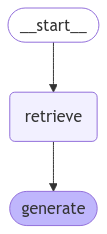

In [25]:
from langgraph.graph import START, StateGraph
from IPython.display import Image, display

# Define the application workflow using LangGraph
graph_builder = StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()

# Visualize the graph (optional, for debugging/understanding)
display(Image(graph.get_graph().draw_mermaid_png()))


In [26]:
# Test the RAG application with a sample query
response = graph.invoke({"question": "What is the purpose of this support website?"})

# Display the retrieved context and generated answer
print(f"Retrieved Context:\n{response['context']}\n")
print(f"Generated Answer:\n{response['answer']}")


Retrieved Context:
[Document(id='aab94624-c5e4-4b33-a9cc-b6827e5a0887', metadata={'source': 'https://support.launchgood.com/support/solutions/articles/35000016101-how-do-i-cover-launchgood-fees-', 'title': ' Cover Fees  LaunchGood Support Center ', 'description': 'How to cover fees', 'language': 'en', 'start_index': 1286}, page_content='improve our tools and services, making it easier for you to support the causes that matter most.Empowers change :\xa0Your contribution fuels the positive impact of campaigns around the globe.Thank you for your generosity. Your tip ensures that LaunchGood remains a space where giving back and making a difference go hand in hand.Need further support? Reach out to a LaunchGood Expert at\xa0support@launchgood.com!'), Document(id='d68f477e-14b5-468f-85b8-3485081c4458', metadata={'source': 'https://support.launchgood.com/support/solutions/articles/35000231714-maximize-your-givingtuesday-impact-tips-resources-webinars-and-expert-support', 'title': ' Maximize Y

In [27]:
queries = [
    "How can I reset my password?",
    "What support resources are available?",
    "How do I contact support for billing issues?",
]

for query in queries:
    response = graph.invoke({"question": query})
    print(f"Query: {query}")
    print(f"Answer: {response['answer']}\n")


Query: How can I reset my password?
Answer: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: How can I reset my password? 
Context: Sign into  LaunchGood Support Center 





         










































LaunchGood



LaunchGood Support Center







toggle menu





Enter your search term here...






				Search
			









Enter your search term here...






				Search
			







LaunchGood Support



Get Support
 Welcome   Login  Sign up






      Let's get you logged in
    








Login to the support portal
Enter the details below
















                Remember me on this computer
              



Forgot your password?

 Login 






Are you an agent? 
Login here







Forgot Password
Give us your email address and instructions to reset your pa